In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
hr=pd.read_csv('HR_Analytics.csv')
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [4]:
df=pd.DataFrame(data=hr)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


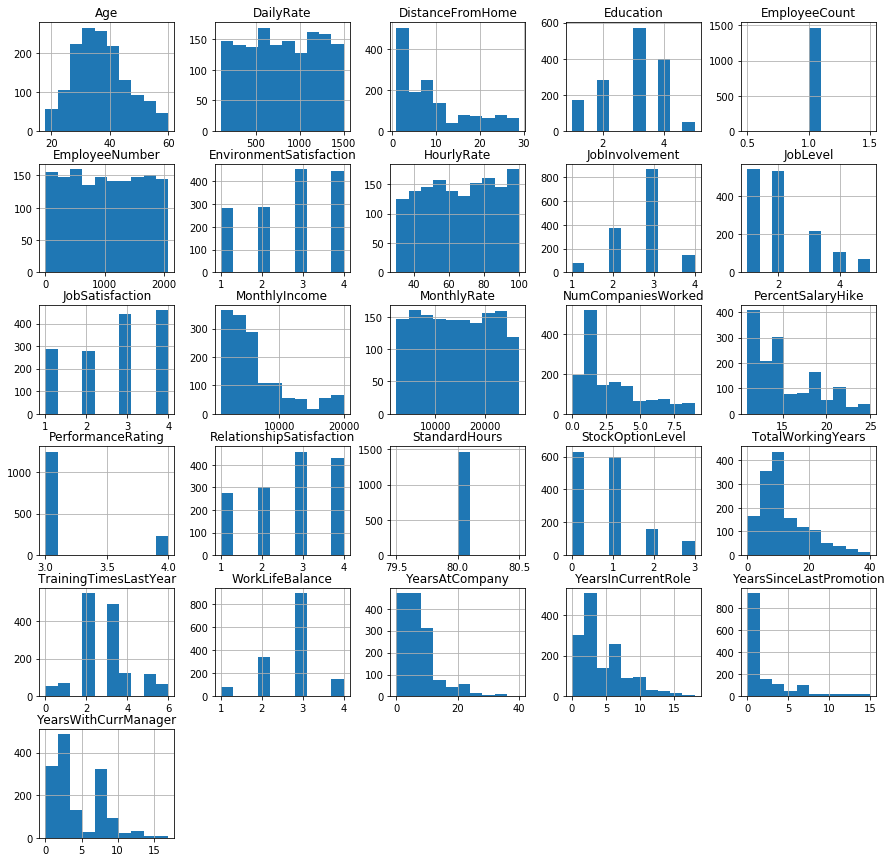

In [11]:
df.hist(figsize=(15,15))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x24596915308>,
 'caps': [<matplotlib.lines.Line2D at 0x24596996f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24596994608>],
 'medians': [<matplotlib.lines.Line2D at 0x24596999fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2459699c7c8>],
 'means': []}

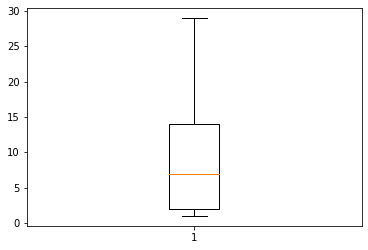

In [12]:
plt.boxplot(df['DistanceFromHome'])

In [13]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [405]:
attr=df[df['Attrition']=='Yes']
attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


{'whiskers': [<matplotlib.lines.Line2D at 0x23057976c88>,
 'caps': [<matplotlib.lines.Line2D at 0x2305795cbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23057976208>],
 'medians': [<matplotlib.lines.Line2D at 0x23057953b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x23057953c48>],
 'means': []}

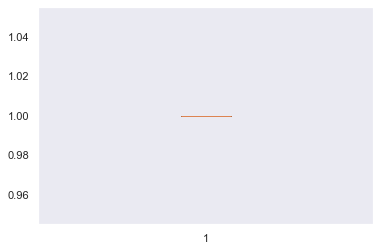

In [406]:
plt.boxplot(df['EmployeeCount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23059530c48>,
 'caps': [<matplotlib.lines.Line2D at 0x23059534b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x230595301c8>],
 'medians': [<matplotlib.lines.Line2D at 0x23059536b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x23059536c08>],
 'means': []}

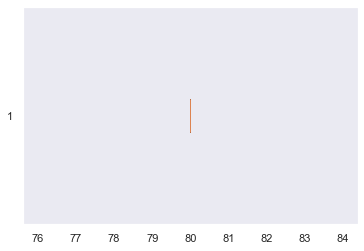

In [407]:
plt.boxplot(df['StandardHours'],vert=False)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2305b7b7288>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2305b7b0f88>,
 'cmins': <matplotlib.collections.LineCollection at 0x2305b7b7d88>,
 'cbars': <matplotlib.collections.LineCollection at 0x2305b7bdc48>}

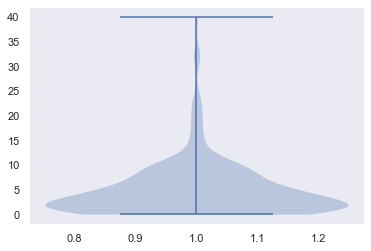

In [408]:
plt.violinplot(attr['YearsAtCompany'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2305b81c608>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2305952a548>,
 'cmins': <matplotlib.collections.LineCollection at 0x2305b821848>,
 'cbars': <matplotlib.collections.LineCollection at 0x2305b821f48>}

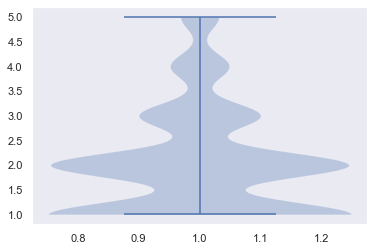

In [409]:
plt.violinplot(df['JobLevel'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2305b883188>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2305b7b7048>,
 'cmins': <matplotlib.collections.LineCollection at 0x2305b883bc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2305b886ac8>}

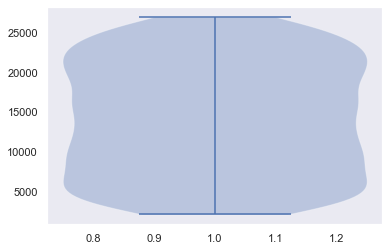

In [410]:
plt.violinplot(df['MonthlyRate'])

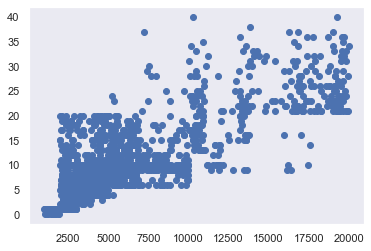

In [411]:
plt.scatter('MonthlyIncome','TotalWorkingYears',data=df)

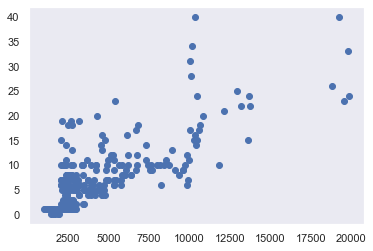

In [412]:
plt.scatter('MonthlyIncome','TotalWorkingYears',data=attr)

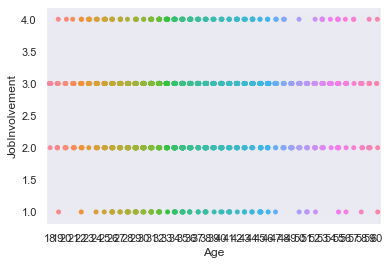

In [263]:
sns.stripplot('Age','JobInvolvement',data=df)

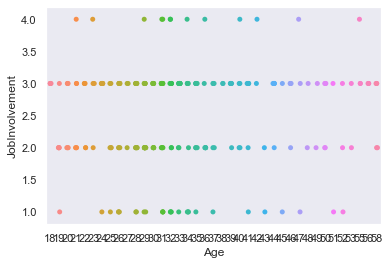

In [264]:
sns.stripplot('Age','JobInvolvement',data=attr)

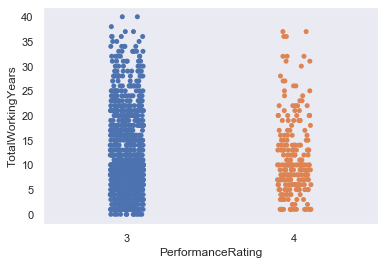

In [265]:
sns.stripplot('PerformanceRating','TotalWorkingYears',data=df)

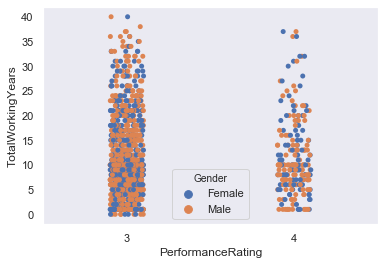

In [266]:
sns.stripplot('PerformanceRating','TotalWorkingYears',hue='Gender',data=df)

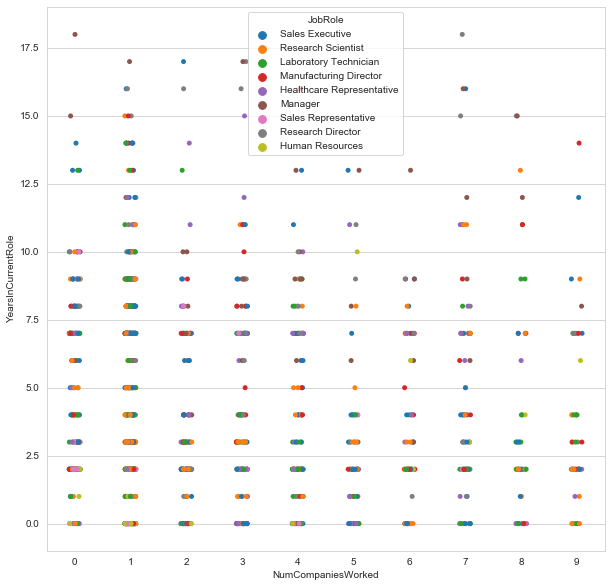

In [28]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.stripplot('NumCompaniesWorked','YearsInCurrentRole',hue='JobRole',data=df)

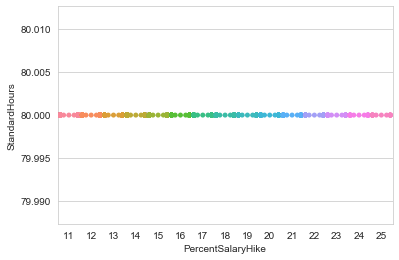

In [29]:
sns.swarmplot('PercentSalaryHike','StandardHours',data=df)

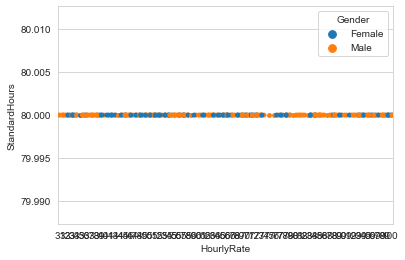

In [30]:
sns.swarmplot('HourlyRate','StandardHours',hue='Gender',data=attr)

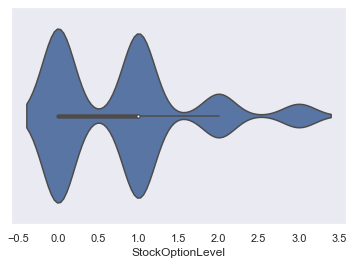

In [267]:
sns.violinplot(df['StockOptionLevel'])

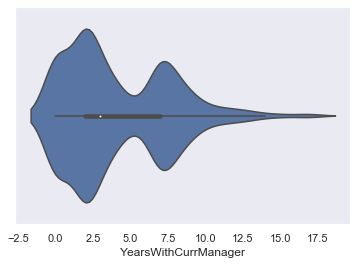

In [268]:
sns.violinplot(df['YearsWithCurrManager'])

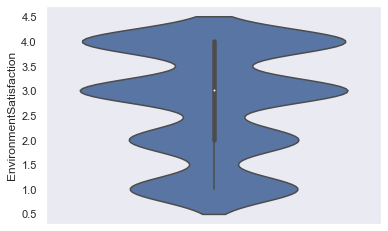

In [413]:
sns.violinplot(y='EnvironmentSatisfaction',data=df)

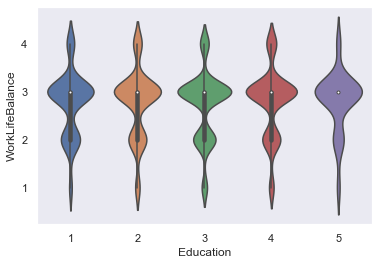

In [414]:
sns.violinplot('Education','WorkLifeBalance',data=df)

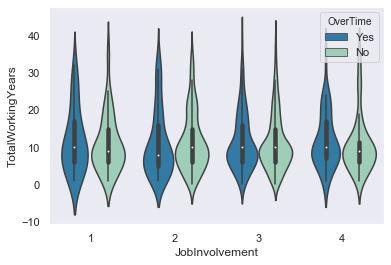

In [415]:
sns.violinplot('JobInvolvement','TotalWorkingYears',hue='OverTime',data=df,palette='YlGnBu_r')

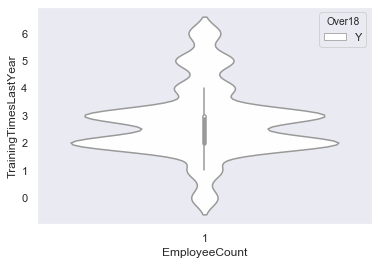

In [416]:
sns.violinplot('EmployeeCount','TrainingTimesLastYear',hue='Over18',data=df,palette='RdGy_r')

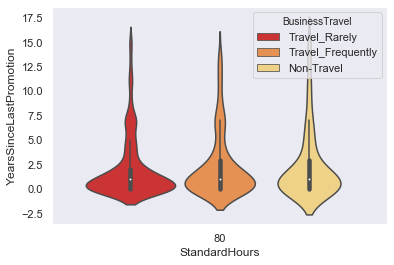

In [417]:
sns.violinplot('StandardHours','YearsSinceLastPromotion',hue='BusinessTravel',data=df,palette='YlOrRd_r')

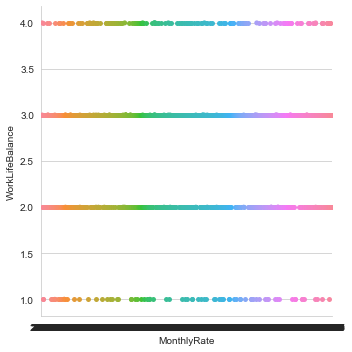

In [38]:
sns.catplot('MonthlyRate','WorkLifeBalance',data=df)

<Figure size 720x720 with 0 Axes>

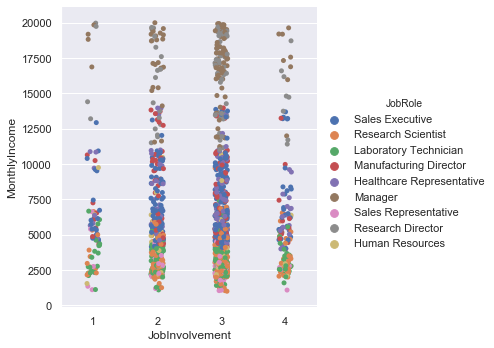

In [314]:
plt.figure(figsize=(10,10))
sns.set(style='darkgrid')
sns.catplot('JobInvolvement','MonthlyIncome',hue='JobRole',data=df)

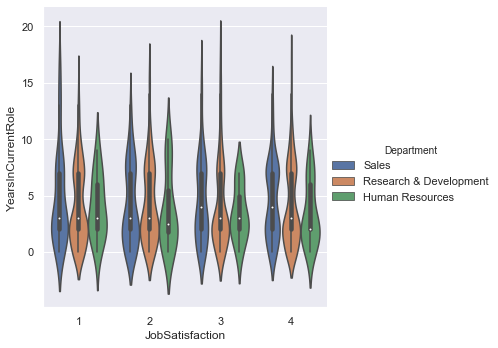

In [315]:
sns.catplot('JobSatisfaction','YearsInCurrentRole',hue='Department',data=df,kind='violin')

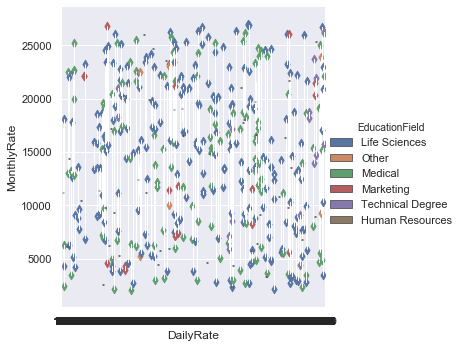

In [316]:
sns.catplot('DailyRate','MonthlyRate',hue='EducationField',data=df,kind='boxen')

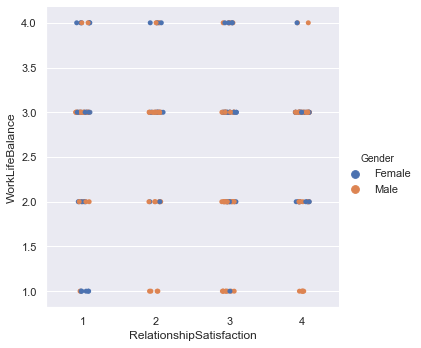

In [317]:
sns.catplot('RelationshipSatisfaction','WorkLifeBalance',hue='Gender',data=attr,kind='strip')

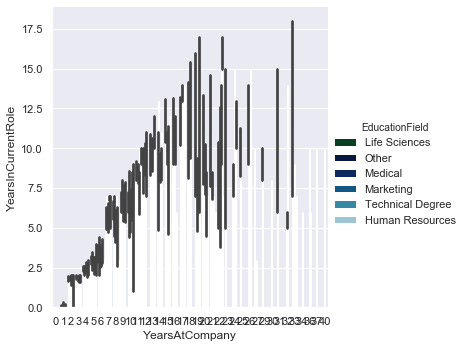

In [43]:
sns.catplot('YearsAtCompany','YearsInCurrentRole',hue='EducationField',data=df,kind='bar',palette='ocean')

<Figure size 720x720 with 0 Axes>

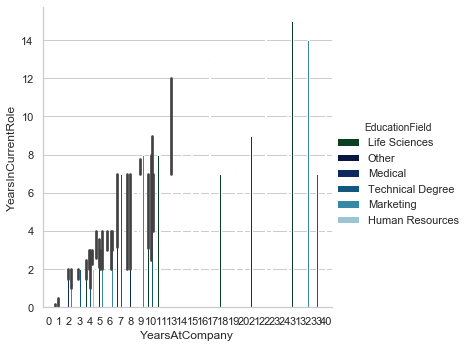

In [44]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.catplot('YearsAtCompany','YearsInCurrentRole',hue='EducationField',data=attr,kind='bar',palette='ocean')

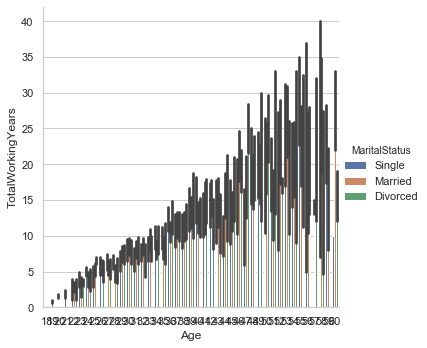

In [45]:
sns.catplot('Age','TotalWorkingYears',hue='MaritalStatus',data=df,kind='bar')

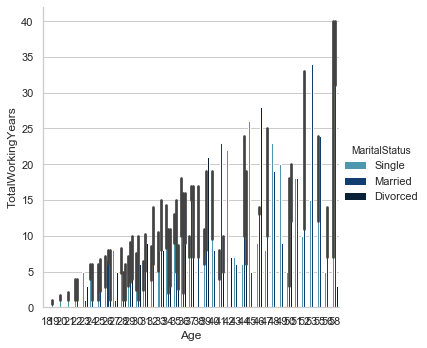

In [46]:
sns.catplot('Age','TotalWorkingYears',hue='MaritalStatus',data=attr,kind='bar',palette='ocean_r')

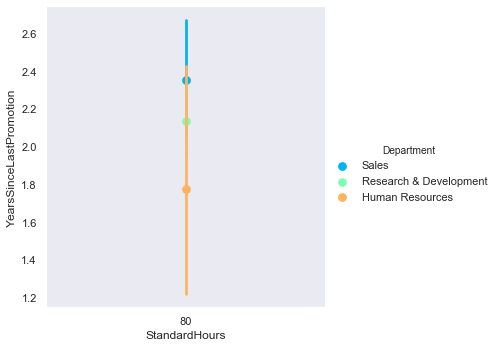

In [460]:
sns.catplot('StandardHours','YearsSinceLastPromotion',hue='Department',data=df,kind='point',palette='rainbow')

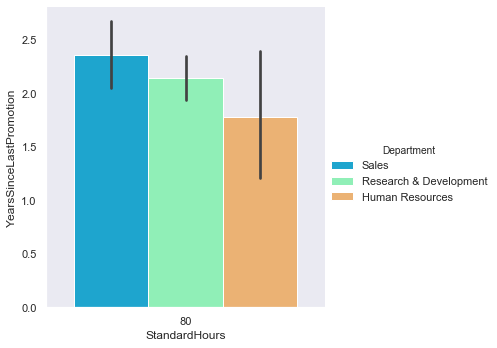

In [461]:
sns.set_style('dark')
sns.catplot('StandardHours','YearsSinceLastPromotion',hue='Department',data=df,kind='bar',palette='rainbow')

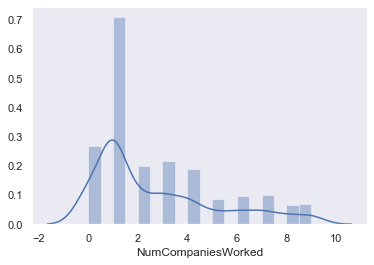

In [462]:
sns.distplot(df['NumCompaniesWorked'])

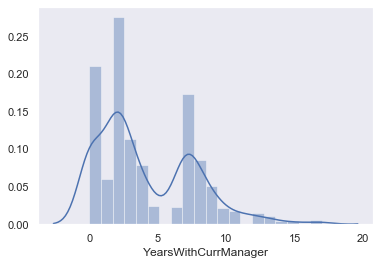

In [463]:
sns.distplot(df['YearsWithCurrManager'])

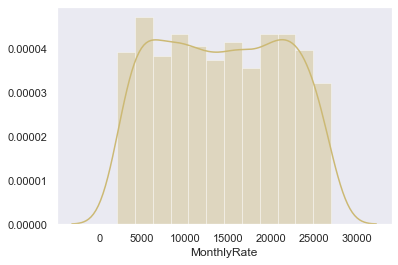

In [464]:
sns.distplot(df['MonthlyRate'],color='y')

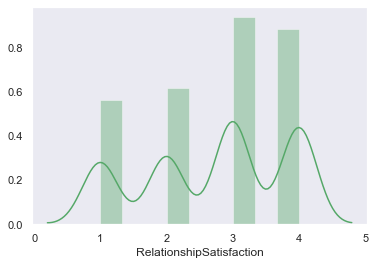

In [465]:
sns.distplot(df['RelationshipSatisfaction'],color='g')

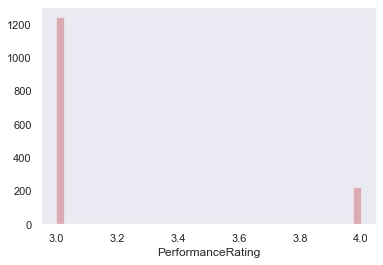

In [466]:
sns.distplot(df['PerformanceRating'],kde=False,color='r')

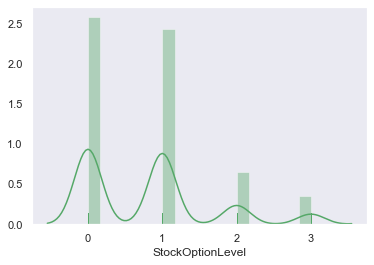

In [467]:
sns.distplot(df['StockOptionLevel'],rug=True,color='g')

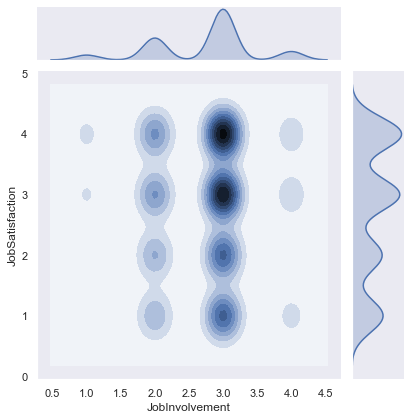

In [468]:
sns.jointplot('JobInvolvement','JobSatisfaction',data=df,kind='kde')

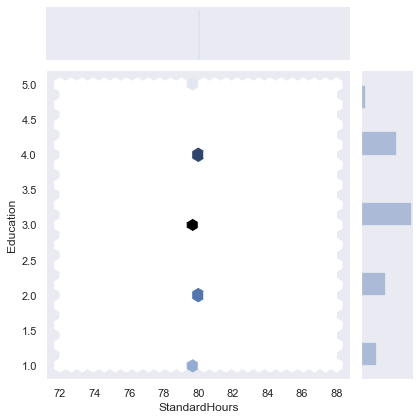

In [469]:
sns.jointplot('StandardHours','Education',data=df,kind='hex')

In [13]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


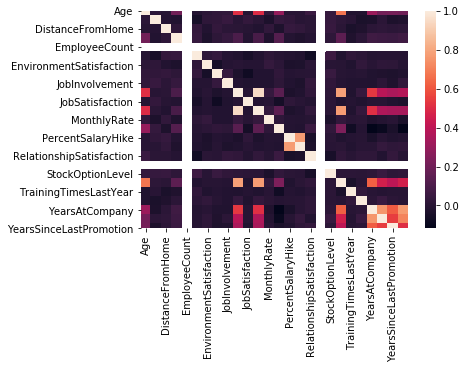

In [14]:
sns.heatmap(df.corr())

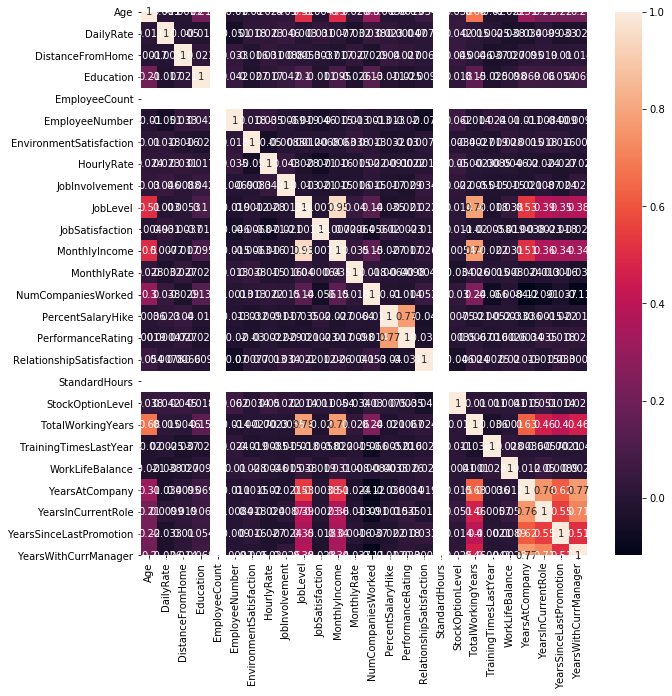

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [17]:
le=LabelEncoder()

In [18]:
df.shape

(1470, 35)

In [19]:
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [20]:
print(df.shape)

(1470, 35)


In [21]:
df=pd.get_dummies(df,drop_first=True)

In [22]:
print(df.shape)

(1470, 49)


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler(feature_range=(0, 5))
df_col = list(df.columns)
df_col.remove('Attrition')
for col in df_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [25]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('float32'): Index(['Attrition'], dtype='object'),
 dtype('float64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
        'Department_Research & Development', 'Department_Sales',
        'EducationField_Life Sciences', 'EducationField_Marketing',
        'EducationField_Medical', 'EducationField_Other',
        'EducationField_Technical Degree', 'JobRole_Human Resources

In [26]:
print(df.shape)

(1470, 49)


In [27]:
y=df['Attrition']

In [28]:
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))


Size of Full dataset is: (1470, 44)


In [29]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=.25,random_state=45)

In [30]:
models=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]

In [31]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

0.8777173913043478
[[291   7]
 [ 38  32]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       298
         1.0       0.82      0.46      0.59        70

    accuracy                           0.88       368
   macro avg       0.85      0.72      0.76       368
weighted avg       0.87      0.88      0.86       368

0.8125
[[298   0]
 [ 69   1]]
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90       298
         1.0       1.00      0.01      0.03        70

    accuracy                           0.81       368
   macro avg       0.91      0.51      0.46       368
weighted avg       0.85      0.81      0.73       368

0.8369565217391305
[[293   5]
 [ 55  15]]
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91       298
         1.0       0.75      0.21      0.33        70

    accuracy                           0.84       368
   macro avg  

In [32]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.8364767339604652

In [33]:
from sklearn.model_selection import KFold

In [34]:
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
for name, model in enumerate(models):
    kfold =KFold(n_splits=10, random_state=40)  

    cv_acc_results =cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results =cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Algorithm'], ascending=True)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,0.0,81.80,5.94,87.93,4.24
1,1.0,75.67,7.92,85.12,4.22
2,2.0,63.00,6.93,84.40,3.68
3,3.0,62.65,8.65,78.76,4.07
4,4.0,74.00,6.28,60.61,10.76


In [35]:
lg=LogisticRegression()
score=cross_val_score(lg,df,y,cv=10,scoring='accuracy')
print(score.mean())
print(score.std())

0.8850172019937187
0.01964887583357788


In [36]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [37]:
parameter={'solver':('sag','saga'),'C':[1,5,8,10]}
grid=GridSearchCV(lg,parameter)
grid.fit(df,y)
print(grid)
print(grid.cv_results_.keys())
print(grid.best_score_)
print(grid.best_estimator_.solver)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 8, 10], 'solver': ('sag', 'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_solver', 'params', 'split0_test_score', 'split1_test

In [41]:
lg=LogisticRegression(solver='saga',C=1)
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8777173913043478
[[291   7]
 [ 38  32]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       298
         1.0       0.82      0.46      0.59        70

    accuracy                           0.88       368
   macro avg       0.85      0.72      0.76       368
weighted avg       0.87      0.88      0.86       368



In [42]:
from sklearn.externals import joblib

In [43]:
joblib.dump(lg,'HRfile.obj')

['HRfile.obj']